<a href="https://colab.research.google.com/github/kganesh1999/DSA_marathon/blob/main/List_vs_Set_vs_IndexedSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# List vs Set vs BinaryTreeIndex

## Customer Database Generation

In [ ]:
pip install faker

In [ ]:
import time
import random
import sys
import uuid
from faker import Faker

Generate Person Data (Unique ID, Phone Number)

In [ ]:
fake = Faker()

def generate_customer_data(num_entries, phone_digits=10):
    """
    Generate a dataset of person IDs (UUIDs), person name and phone numbers.

    Args:
        num_entries (int): Number of entries to generate.
        phone_digits (int): Number of digits in the phone numbers.

    Returns:
        list: A list of tuples with (person_id, phone_number).
    """
    data = []
    for _ in range(num_entries):
        person_id = str(uuid.uuid4())  # Generate random UUID
        person_name = fake.name()
        phone_number = ''.join(random.choices("0123456789", k=phone_digits))  # Generate random phone number
        data.append((person_id, person_name, phone_number))
    return data

def generate_uuid_list(n):
    return [str(uuid.uuid4()) for _ in range(n)]

In [ ]:
print("Sample data generated")
sample_customer_data = generate_customer_data(5)
details = ['ID', 'Name', 'Contact']
for data in sample_customer_data:
    print(dict(zip(details, data)))

Sample data generated
{'ID': 'ad82bb0f-6c01-4229-955f-c414d405f1a6', 'Name': 'Heather Owen', 'Contact': '5371008998'}
{'ID': '8f7502f8-a176-419c-ad7f-18d9b64d4b32', 'Name': 'Alexander Simon', 'Contact': '7165027445'}
{'ID': '0fd0d859-f5e3-42e9-8da6-6dbe181a722b', 'Name': 'Ashley Barrett', 'Contact': '3307207588'}
{'ID': '607a8c18-9bf1-48ad-85e3-9ee5062b7b42', 'Name': 'Francis Gonzalez', 'Contact': '5199736954'}
{'ID': 'c6048607-f933-4a0e-8b1a-9f6eb5dda125', 'Name': 'Bradley Ayala', 'Contact': '1061702676'}


List vs Set Lookup Overview

**List Lookup**: Searching Without Context

Imagine a manager is trying to find John’s contact information from a stack of 1,000 employee files randomly placed on their desk.

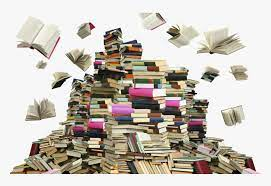

**Outcome**:
The process is slow, especially if the stack is huge. The manager spends a lot of time on unrelated files.


**Set Lookup: Searching With Context**

Now, imagine the manager has an indexed filing cabinet where each drawer is labeled with a unique employee name.

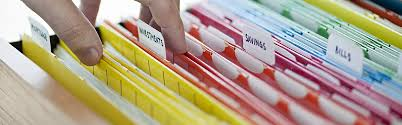

Outcome:
The process is instantaneous, regardless of the number of employees.

### Convert list of UUIDs to index like directory

Functions to create binary-tree like index

In [ ]:
from collections import defaultdict, deque

def build_indexed_map_uuids(uuid_list, prefix_length=2, max_levels=3):
    """
    Builds a multi-level B-tree indexed hashmap from a list of UUID strings.

    Args:
        uuid_list (list): The list of UUID strings to index.
        prefix_length (int): Number of characters to use as the primary key per level.
        max_levels (int): Maximum depth of the B-tree.

    Returns:
        dict: A nested dictionary representing the multi-level B-tree indexed hashmap.
    """
    def insert_into_tree(tree, uuid, level=0):
        if level >= max_levels or len(uuid) < (level + 1) * prefix_length:
            tree[uuid] = uuid  # Store full UUID at leaf level
            return

        key = uuid[level * prefix_length:(level + 1) * prefix_length]  # Extract prefix for current level
        if key not in tree:
            tree[key] = {}
        insert_into_tree(tree[key], uuid, level + 1)

    tree = defaultdict(dict)
    for uuid in uuid_list:
        insert_into_tree(tree, uuid)
    return tree


In [ ]:
def lookup_in_index_map(tree, uuid, prefix_length=2, max_levels=3):
    """
    Looks up a UUID in the B-tree indexed hashmap.

    Args:
        tree (dict): The B-tree indexed hashmap.
        uuid (str): The UUID to look up.
        prefix_length (int): Number of characters used as the primary key per level.
        max_levels (int): Maximum depth of the B-tree.

    Returns:
        str or None: The UUID if found, else None.
    """
    node = tree
    for level in range(max_levels):
        if len(uuid) < (level + 1) * prefix_length:
            return None
        key = uuid[level * prefix_length:(level + 1) * prefix_length]
        if key not in node:
            return None
        node = node[key]
    return node.get(uuid, None)


In [ ]:
def display_index_map(tree, root_node, max_elements=5):
    """
    Performs a BFS traversal on the B-tree and displays the first few elements.

    Args:
        tree (dict): The B-tree indexed hashmap.
        max_elements (int): Maximum number of elements to display.
    """
    queue = deque([(tree, root_node)])
    count = 0

    while queue and count < max_elements:
        node, path = queue.popleft()
        if isinstance(node, dict):
            for key, value in node.items():
                queue.append((value, f"{path} -> {key}"))
        else:
            print(f"{path}: {node}")
            count += 1

## Element search runtime and memory analysis for various data size

#### Case when data size is very less

total_customers = 500

n_customers_to_find = 100

In [ ]:
# Generate random test data
total_customers = 500
n_customers_to_find = 100

# Creating a large list of random integers
customer_data = generate_customer_data(total_customers)
customer_ids = [customer[0] for customer in customer_data]
ids_to_check = customer_ids[:round(n_customers_to_find*0.8)]
ids_to_check.extend(generate_uuid_list(round(n_customers_to_find*0.2)))
random.shuffle(ids_to_check)

In [ ]:
print("Sample of customer data generated ", customer_data[:5])
print("Sample of customer UUIDs to check ", ids_to_check[:5])

Sample of customer data generated  [('bba49707-ef05-4a43-b8c4-05f7ea5fc171', 'Kevin Thompson', '8279038124'), ('7e1f3769-a01f-4dad-b91e-43fe42fdccab', 'Katie Taylor', '2857109953'), ('02906fbe-d34d-4258-8e5b-8142182ed3e3', 'Marvin Ortiz', '9391104791'), ('dbfacd0b-990a-4ee7-bfc4-208808efa84d', 'Meagan Woods', '4642062451'), ('b28b5cf4-2e2d-4804-b774-97f4ccee566b', 'Nancy Chung', '6853513992')]
Sample of customer UUIDs to check  ['96bddd1b-b364-4f92-b0c1-69977698e542', 'f21fe53c-b78e-4e4a-817a-bf3754aa9dfe', 'b101a0fa-addf-49e2-ac37-9165436ba368', '7565e06a-66d6-4880-acd4-1cc874210bb9', '57a1544f-0dbf-4f3b-9fc9-b3a39ba56c35']


##### When Performed in a list

In [ ]:
start_time = time.time()
customer_checked = [(customer_id, any(customer_id == data[0] for data in customer_data)) for customer_id in ids_to_check]
print("Sample of ID check results")
for i in customer_checked[:15]:
  customer_id, is_exists = i
  print(customer_id, is_exists)
end_time = time.time()
time_taken = end_time - start_time
print('\n')
print(f"Time taken for lookup in list: {time_taken:.6f} seconds")
customer_data_size = sys.getsizeof(customer_data)
print(f"Memory used by `elements_list`: {customer_data_size / 1024:.2f} KB")

Sample of ID check results
bf71852e-2c9a-4302-98f7-aff0971752a2 True
084a144a-5901-4b32-8688-565bf4ffe88b True
440a9135-a2b0-4d91-a8f6-13dea45a12a1 False
d7f17557-a5e1-4401-a874-662700ab827f True
3099c2bc-eace-4d1b-a7d9-c413552f4b91 True
7e4fcd57-7e51-4999-a147-35cce3870fb4 True
fd78113a-aaa2-4bb6-a36d-f5dcd64b62d6 True
405deb09-a9d3-4c83-9e91-1591947596d1 True
7c2d9815-c999-4c20-ac71-108a50d78db4 True
6ad4a3a7-73ec-4065-840c-eb53ea97fef1 True
072f21ae-266a-4636-9f17-bb6541900e33 True
fbb0a01f-dae5-4baa-8a58-1a990904bae4 False
a39837f5-8994-44bf-ad1f-7379c579d38c False
6b4fc186-4f05-4b84-b1a1-90140b6ee115 False
28cd6d1f-e44c-4f60-9a6f-1fad5c2845ab False


Time taken for lookup in list: 0.014878 seconds
Memory used by `elements_list`: 4.12 KB


##### When performed in a set

In [ ]:
customer_ids = set(customer_ids)
start_time = time.time()
results = [(customer_id, customer_id in customer_ids) for customer_id in ids_to_check]
print("Sample of ID check results")
for i in customer_checked[:10]:
  customer_id, is_exists = i
  print(customer_id, is_exists)
end_time = time.time()
time_taken = end_time - start_time
print('\n')
print(f"Time taken for lookup in list: {time_taken:.6f} seconds")

customer_ids_set_size = sys.getsizeof(customer_ids)
print(f"Memory used by `element_set`: {customer_ids_set_size / 1024:.2f} KB")

Sample of ID check results
bf71852e-2c9a-4302-98f7-aff0971752a2 True
084a144a-5901-4b32-8688-565bf4ffe88b True
440a9135-a2b0-4d91-a8f6-13dea45a12a1 False
d7f17557-a5e1-4401-a874-662700ab827f True
3099c2bc-eace-4d1b-a7d9-c413552f4b91 True
7e4fcd57-7e51-4999-a147-35cce3870fb4 True
fd78113a-aaa2-4bb6-a36d-f5dcd64b62d6 True
405deb09-a9d3-4c83-9e91-1591947596d1 True
7c2d9815-c999-4c20-ac71-108a50d78db4 True
6ad4a3a7-73ec-4065-840c-eb53ea97fef1 True


Time taken for lookup in list: 0.004050 seconds
Memory used by `element_set`: 16.21 KB


##### When performed in indexed map

In [ ]:
index_map = build_indexed_map_uuids(customer_ids, prefix_length=2, max_levels=3)
# Inspect the index-map
print("Root keys:", list(index_map.keys())[:5])  # Display first 5 keys at root

Root keys: ['7a', 'aa', '28', '9e', 'cc']
Child 7a keys: ['b7', '0c', '67', '63', 'c3']


In [ ]:
index_map_2 = build_indexed_map_uuids(customer_ids, prefix_length=5, max_levels=5)
# Inspect the B-tree structure
print("Root keys:", list(index_map_2.keys())[:5])  # Display first 5 keys at root

Root keys: ['bba49', '7e1f3', '02906', 'dbfac', 'b28b5']


In [ ]:
display_index_map(index_map_2["bba49"], "bba49")

bba49 -> 707-e -> f05-4 -> a43-b -> 8c4-0 -> bba49707-ef05-4a43-b8c4-05f7ea5fc171: bba49707-ef05-4a43-b8c4-05f7ea5fc171


In [ ]:
#Perform lookup on indexed map
start_time = time.time()
results = [element == lookup_in_index_map(index_map_2, element, 5, 5) for element in ids_to_check]
end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken for lookup in indexed tree: {time_taken:.6f} seconds")
index_map_2_size = sys.getsizeof(index_map_2)
print(f"Memory used by `indexed_tree`: {index_map_2_size / 1024:.2f} KB")

Time taken for lookup in indexed tree: 0.000560 seconds
Memory used by `indexed_tree`: 12.76 KB


In [ ]:
display_index_map(index_map["7a"], "7a")

7a -> b7 -> 20 -> 7ab72017-803a-4dcc-809d-7e2c898b8a08: 7ab72017-803a-4dcc-809d-7e2c898b8a08
7a -> 0c -> ae -> 7a0cae70-b304-4e96-9b1e-f9c9348d8ea1: 7a0cae70-b304-4e96-9b1e-f9c9348d8ea1
7a -> 67 -> fd -> 7a67fd23-1b37-4d86-8a4d-61eee157555d: 7a67fd23-1b37-4d86-8a4d-61eee157555d
7a -> 63 -> 44 -> 7a6344ae-c433-4af3-a643-233019422a50: 7a6344ae-c433-4af3-a643-233019422a50
7a -> c3 -> 02 -> 7ac30246-30e3-4d5f-8771-cfc91d2a400e: 7ac30246-30e3-4d5f-8771-cfc91d2a400e


In [ ]:
display_index_map(index_map["aa"], "aa")

aa -> da -> 16 -> aada1680-c953-4768-a32c-c33de01ece6e: aada1680-c953-4768-a32c-c33de01ece6e
aa -> f3 -> 52 -> aaf352cc-2814-47db-9b79-136268377655: aaf352cc-2814-47db-9b79-136268377655
aa -> c2 -> 89 -> aac289a5-31de-4470-b5e3-a036031a5191: aac289a5-31de-4470-b5e3-a036031a5191
aa -> 11 -> 98 -> aa1198ca-7247-4445-a71f-93088f961854: aa1198ca-7247-4445-a71f-93088f961854
aa -> d0 -> 65 -> aad0655e-1b0f-4bc6-b996-36120661220f: aad0655e-1b0f-4bc6-b996-36120661220f


In [ ]:
display_index_map(index_map["28"], "28")

28 -> 75 -> 45 -> 287545ce-5c88-4fba-bfc1-1047222f3b5e: 287545ce-5c88-4fba-bfc1-1047222f3b5e
28 -> 91 -> e1 -> 2891e1e9-f238-47f9-8202-ec6e0951aa93: 2891e1e9-f238-47f9-8202-ec6e0951aa93
28 -> 9d -> b4 -> 289db4b7-97cb-438c-b7b4-801537b804fb: 289db4b7-97cb-438c-b7b4-801537b804fb
28 -> de -> 11 -> 28de1152-8dcf-4d9e-b1db-b3d636f2ce51: 28de1152-8dcf-4d9e-b1db-b3d636f2ce51


Representation of index_map like a index-directory


In [ ]:
index_directory = {
    "7a": {
        "b7": {
            "20": "7ab72017-803a-4dcc-809d-7e2c898b8a08"
        },
        "0c": {
            "ae": "7a0cae70-b304-4e96-9b1e-f9c9348d8ea1"
        },
        "67": {
            "fd": "7a67fd23-1b37-4d86-8a4d-61eee157555d"
        },
        "63": {
            "44": "7a6344ae-c433-4af3-a643-233019422a50"
        },
        "c3": {
            "02": "7ac30246-30e3-4d5f-8771-cfc91d2a400e"
        }
    },
    "aa": {
        "da": {
            "16": "aada1680-c953-4768-a32c-c33de01ece6e"
        },
        "f3": {
            "52": "aaf352cc-2814-47db-9b79-136268377655"
        },
        "c2": {
            "89": "aac289a5-31de-4470-b5e3-a036031a5191"
        },
        "11": {
            "98": "aa1198ca-7247-4445-a71f-93088f961854"
        },
        "d0": {
            "65": "aad0655e-1b0f-4bc6-b996-36120661220f"
        }
    },
    "28": {
        "75": {
            "45": "287545ce-5c88-4fba-bfc1-1047222f3b5e"
        },
        "91": {
            "e1": "2891e1e9-f238-47f9-8202-ec6e0951aa93"
        },
        "9d": {
            "b4": "289db4b7-97cb-438c-b7b4-801537b804fb"
        },
        "de": {
            "11": "28de1152-8dcf-4d9e-b1db-b3d636f2ce51"
        }
    }
}


In [ ]:
# Test lookup
test_value = customer_ids[0]
found_value = lookup_in_index_map(index_map, test_value)
print(f"Looking for {test_value}, Found: {found_value}")


Looking for 7ab72017-803a-4dcc-809d-7e2c898b8a08, Found: 7ab72017-803a-4dcc-809d-7e2c898b8a08


In [ ]:
#Perform lookup on indexed map
start_time = time.time()
results = [element == lookup_in_index_map(index_map, element) for element in ids_to_check]
end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken for lookup in indexed tree: {time_taken:.6f} seconds")
index_map_size = sys.getsizeof(index_map)
print(f"Memory used by `indexed_tree`: {index_map_size / 1024:.2f} KB")

Time taken for lookup in indexed tree: 0.000442 seconds
Memory used by `indexed_tree`: 6.43 KB


#### Case when data size is large

total_customers = 1000000 (10 lakhs)

n_customers_to_find = 1000

In [ ]:
# Generate random test data
total_customers = 1000000
n_customers_to_find = 1000

# Creating a large list of random integers
customer_data = generate_customer_data(total_customers)
customer_ids = [customer[0] for customer in customer_data]
ids_to_check = customer_ids[:round(n_customers_to_find*0.8)]
ids_to_check.extend(generate_uuid_list(round(n_customers_to_find*0.2)))
random.shuffle(ids_to_check)

##### When performed in a list

In [ ]:
start_time = time.time()
customer_checked = [(customer_id, any(customer_id == data[0] for data in customer_data)) for customer_id in ids_to_check]
print("Sample of ID check results")
for i in customer_checked[:15]:
  customer_id, is_exists = i
  print(customer_id, is_exists)
end_time = time.time()
time_taken = end_time - start_time
print('\n')
print(f"Time taken for lookup in list: {time_taken:.6f} seconds")
customer_data_size = sys.getsizeof(customer_data)
print(f"Memory used by `elements_list`: {customer_data_size / 1024:.2f} KB")

Sample of ID check results
10c8cab4-6f0d-49de-9157-8c6eb0f8c4ee True
7408abde-95fd-480a-abea-fff0ce613936 True
aa194827-682c-4e7f-b4b0-c46d387173aa True
716d9b7f-7456-429a-8ed1-5d712e961741 True
9e2c8be0-2d64-4b3c-b638-e2435380e229 False
60711b6c-14e5-458e-b345-46ae50475354 False
337d209c-607b-4cb5-a46f-1be7cddd718f True
22238fb3-8ada-4291-b060-e789357005ae True
ba972b51-a459-4812-8615-3dd27b6b3578 True
03151510-7d31-45a5-bb8e-b81543c0e281 True
455c1ebf-052a-4cfc-966d-788d7587f8cb True
a6418c94-3a31-4e1c-9786-258c3063feb1 False
1707fd02-f752-4f84-a592-c2967991dd80 False
613ba3c3-e4c9-4212-919a-9cfc4edcf353 True
32f7f47a-a2bc-4259-8b6f-c5bcc9bca940 True


Time taken for lookup in list: 25.663711 seconds
Memory used by `elements_list`: 8250.71 KB


##### When performed in a set

In [ ]:
customer_ids = set(customer_ids)
start_time = time.time()
results = [(customer_id, customer_id in customer_ids) for customer_id in ids_to_check]
print("Sample of ID check results")
for i in customer_checked[:10]:
  customer_id, is_exists = i
  print(customer_id, is_exists)
end_time = time.time()
time_taken = end_time - start_time
print('\n')
print(f"Time taken for lookup in list: {time_taken:.6f} seconds")
customer_ids_set_size = sys.getsizeof(customer_ids)
print(f"Memory used by `element_set`: {customer_ids_set_size / 1024:.2f} KB")

Sample of ID check results
10c8cab4-6f0d-49de-9157-8c6eb0f8c4ee True
7408abde-95fd-480a-abea-fff0ce613936 True
aa194827-682c-4e7f-b4b0-c46d387173aa True
716d9b7f-7456-429a-8ed1-5d712e961741 True
9e2c8be0-2d64-4b3c-b638-e2435380e229 False
60711b6c-14e5-458e-b345-46ae50475354 False
337d209c-607b-4cb5-a46f-1be7cddd718f True
22238fb3-8ada-4291-b060-e789357005ae True
ba972b51-a459-4812-8615-3dd27b6b3578 True
03151510-7d31-45a5-bb8e-b81543c0e281 True


Time taken for lookup in list: 0.120949 seconds
Memory used by `element_set`: 32768.21 KB


##### When performed in indexed tree

In [ ]:
index_map = build_indexed_map_uuids(customer_ids, prefix_length=2, max_levels=3)
# Inspect the B-tree structure
print("Root keys:", list(index_map.keys())[:5])  # Display first 5 keys at root

Root keys: ['e9', '5b', '06', 'e5', '47']
Child e9 keys: ['80', 'de', 'f2', 'b0', '58']


In [ ]:
# Test lookup
test_value = customer_ids[100]
found_value = lookup_in_index_map(index_map, test_value)
print(f"Looking for {test_value}, Found: {found_value}")


Looking for 93515540-5821-43db-8bcc-116c8c2126a3, Found: 93515540-5821-43db-8bcc-116c8c2126a3


In [ ]:
#Perform lookup on tree
start_time = time.time()
results = [element == lookup_in_index_map(index_map, uuid=element) for element in ids_to_check]
end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken for lookup in indexed tree: {time_taken:.6f} seconds")
index_map_size = sys.getsizeof(index_map)
print(f"Memory used by `indexed_tree`: {index_map_size / 1024:.2f} KB")

Time taken for lookup in indexed tree: 0.002262 seconds
Memory used by `indexed_tree`: 6.43 KB


#### Case when data size is very large

total_customers = 10000000 (1 crore)

n_customers_to_find = 10000

In [ ]:
# Generate random test data
total_customers = 10000000
n_customers_to_find = 10000

# Creating a large list of random integers
customer_data = generate_customer_data(total_customers)
customer_ids = [customer[0] for customer in customer_data]
ids_to_check = customer_ids[:round(n_customers_to_find*0.8)]
ids_to_check.extend(generate_uuid_list(round(n_customers_to_find*0.2)))
random.shuffle(ids_to_check)

##### When performed in a list

In [ ]:
start_time = time.time()
customer_checked = [(customer_id, any(customer_id == data[0] for data in customer_data)) for customer_id in ids_to_check]
print("Sample of ID check results")
for i in customer_checked[:15]:
  customer_id, is_exists = i
  print(customer_id, is_exists)
end_time = time.time()
time_taken = end_time - start_time
print('\n')
print(f"Time taken for lookup in list: {time_taken:.6f} seconds")
customer_data_size = sys.getsizeof(customer_data)
print(f"Memory used by `elements_list`: {customer_data_size / 1024:.2f} KB")

Sample of ID check results
66b3b5ee-8459-4088-a2f6-75c7b9c55eb4 True
7e20add8-7efc-4ab1-b1d6-3356403baee8 True
36c7fcba-a98d-4b7a-b05a-f7452eecceaa False
c43d1d6b-a47f-4bbd-bc2e-d9ed43e96eac True
dcbdc3a2-e204-4fbe-b472-ed43054f9301 True
a3d5c56c-48a8-4dd0-b776-0559aa5a4b03 True
f736550f-0786-4f2e-a92f-0c5ab9cedbc6 True
8cde1ae9-5db1-4421-96dd-064d97a63580 False
f3f69e60-1c6c-4d7e-b6bb-35f06042aace True
2b1a394f-20c2-488b-9064-2f0bf87d021d True
1bdfd0fc-aabd-4c70-b41f-c3646282846b True
fc4273c8-1ee0-46b3-9baa-99fe7d34d6b3 True
7229b8f9-91b5-4a3d-b3cc-90a7644ad094 True
d6ac46f7-6df0-4c48-8737-4cf4558bb00b True
8d5ff17e-507d-4af5-bbb2-12a025210af5 True


Time taken for lookup in list: 2478.430261 seconds
Memory used by `elements_list`: 87006.99 KB


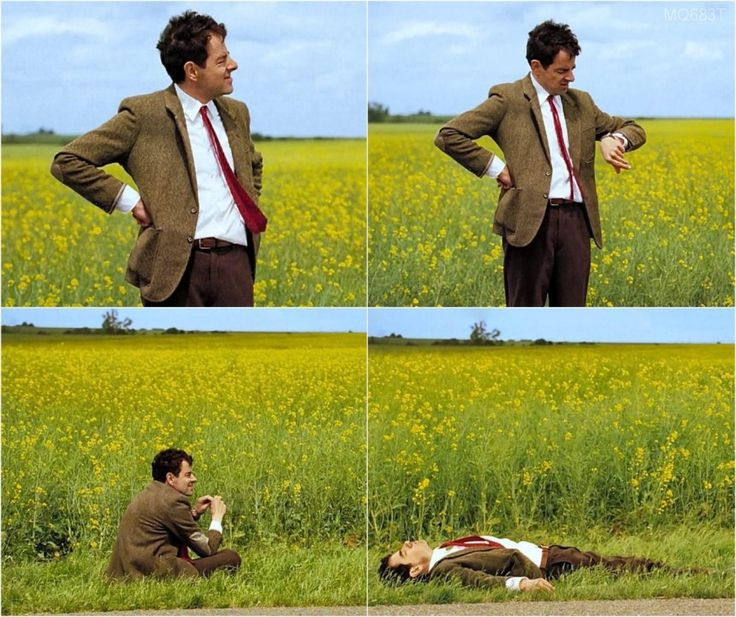


##### When perfomed in a set

In [ ]:
customer_ids = set(customer_ids)
start_time = time.time()
results = [(customer_id, customer_id in customer_ids) for customer_id in ids_to_check]
print("Sample of ID check results")
for i in customer_checked[:10]:
  customer_id, is_exists = i
  print(customer_id, is_exists)
end_time = time.time()
time_taken = end_time - start_time
print('\n')
print(f"Time taken for lookup in list: {time_taken:.6f} seconds")
customer_ids_set_size = sys.getsizeof(customer_ids)
print(f"Memory used by `element_set`: {customer_ids_set_size / 1024:.2f} KB")

Sample of ID check results
66b3b5ee-8459-4088-a2f6-75c7b9c55eb4 True
7e20add8-7efc-4ab1-b1d6-3356403baee8 True
36c7fcba-a98d-4b7a-b05a-f7452eecceaa False
c43d1d6b-a47f-4bbd-bc2e-d9ed43e96eac True
dcbdc3a2-e204-4fbe-b472-ed43054f9301 True
a3d5c56c-48a8-4dd0-b776-0559aa5a4b03 True
f736550f-0786-4f2e-a92f-0c5ab9cedbc6 True
8cde1ae9-5db1-4421-96dd-064d97a63580 False
f3f69e60-1c6c-4d7e-b6bb-35f06042aace True
2b1a394f-20c2-488b-9064-2f0bf87d021d True


Time taken for lookup in list: 1.753436 seconds
Memory used by `element_set`: 262144.21 KB


##### When performed in indexed tree

In [ ]:
index_map = build_indexed_map_uuids(customer_ids, prefix_length=2, max_levels=3)
# Inspect the B-tree structure
print("Root keys:", list(index_map.keys())[:5])  # Display first 5 keys at root

Root keys: ['1b', 'f2', '88', '22', '40']


In [ ]:
#Perform lookup on tree
start_time = time.time()
results = [element == lookup_in_index_map(index_map, element) for element in ids_to_check]
end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken for lookup in indexed tree: {time_taken:.6f} seconds")
index_map_size = sys.getsizeof(index_map)
print(f"Memory used by `element_tree`: {index_map_size / 1024:.2f} KB")

Time taken for lookup in indexed tree: 0.029100 seconds
Memory used by `element_tree`: 6.43 KB
